In [38]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import time
import datascience as ds
np.random.seed(42)
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,10)
plt.style.use('fivethirtyeight')

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from IPython.display import Image
import folium
from folium import IFrame
from folium.plugins import MarkerCluster
from folium import plugins
from datetime import datetime
import datetime as dt
import json
from scipy import stats

import os

## Data processing

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pm = "hdata/NYC_AQ/NYC_PM_Part1.csv"
pmdata = pd.read_csv('NYC_Pilot2_PM_Part1.csv') #contents of data)
pmdata.head()

,SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,...,bin17,bin18,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm25
0,NYCP2_CS01A,1631277304,40.847672,-73.869316,11,1,1,0,0,0,...,0,0,0,0,0,0,0,23.7,57.3,4.508813
1,NYCP2_CS01A,1631277308,40.847668,-73.869316,22,4,1,0,0,2,...,0,0,0,0,0,0,0,23.7,57.8,5.462420
2,NYCP2_CS01A,1631277313,40.847649,-73.869362,40,1,1,0,0,1,...,0,0,0,0,0,0,0,23.7,57.8,5.154881
3,NYCP2_CS01A,1631277318,40.847649,-73.869362,26,1,0,0,0,0,...,0,0,0,0,0,0,0,23.6,57.6,4.508813
4,NYCP2_CS01A,1631277323,40.847649,-73.869362,44,4,0,1,0,0,...,0,0,0,0,0,0,0,23.6,57.5,5.539503


In [4]:
pmdata = \
pmdata[(pmdata['latitude']!=0) & \
       (pmdata['longitude'] !=0)]

In [5]:
gdf_pm25=gpd.GeoDataFrame(pmdata, geometry=gpd.points_from_xy(pmdata.longitude, pmdata.latitude))
gdf_pm25=gdf_pm25.set_crs(epsg=4326)

In [6]:
geojsonfile = "https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson"
# Create a GeoDataFrame from the DataFrame by converting lat/lon to geometry
gdf_neighbourhoods = gpd.read_file(geojsonfile)
#gdf_neighbourhoods.crs

In [7]:
from geopandas.tools import sjoin
# Perform spatial join
joined_gdf_pm25 = sjoin(gdf_pm25, gdf_neighbourhoods, predicate="within")
joined_gdf_pm25.head()

,SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,...,bin23,temperature,humidity,pm25,geometry,index_right,neighborhood,boroughCode,borough,@id
0,NYCP2_CS01A,1631277304,40.847672,-73.869316,11,1,1,0,0,0,...,0,23.7,57.3,4.508813,POINT (-73.86932 40.84767),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...
1,NYCP2_CS01A,1631277308,40.847668,-73.869316,22,4,1,0,0,2,...,0,23.7,57.8,5.462420,POINT (-73.86932 40.84767),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...
2,NYCP2_CS01A,1631277313,40.847649,-73.869362,40,1,1,0,0,1,...,0,23.7,57.8,5.154881,POINT (-73.86936 40.84765),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...
3,NYCP2_CS01A,1631277318,40.847649,-73.869362,26,1,0,0,0,0,...,0,23.6,57.6,4.508813,POINT (-73.86936 40.84765),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...
4,NYCP2_CS01A,1631277323,40.847649,-73.869362,44,4,0,1,0,0,...,0,23.6,57.5,5.539503,POINT (-73.86936 40.84765),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...


In [11]:
# Count NaN values for each feature
joined_gdf_pm25.isnull().sum()
joined_gdf_pm25 = joined_gdf_pm25.dropna()

In [12]:
# Select columns to copy
columns_to_copy = ['neighborhood','latitude', 'longitude', 'pm25']  # Replace with the names of the
new_joined_gdf_pm25_2 = joined_gdf_pm25[columns_to_copy].copy()
type(new_joined_gdf_pm25_2)

pandas.core.frame.DataFrame

## Data Visualization

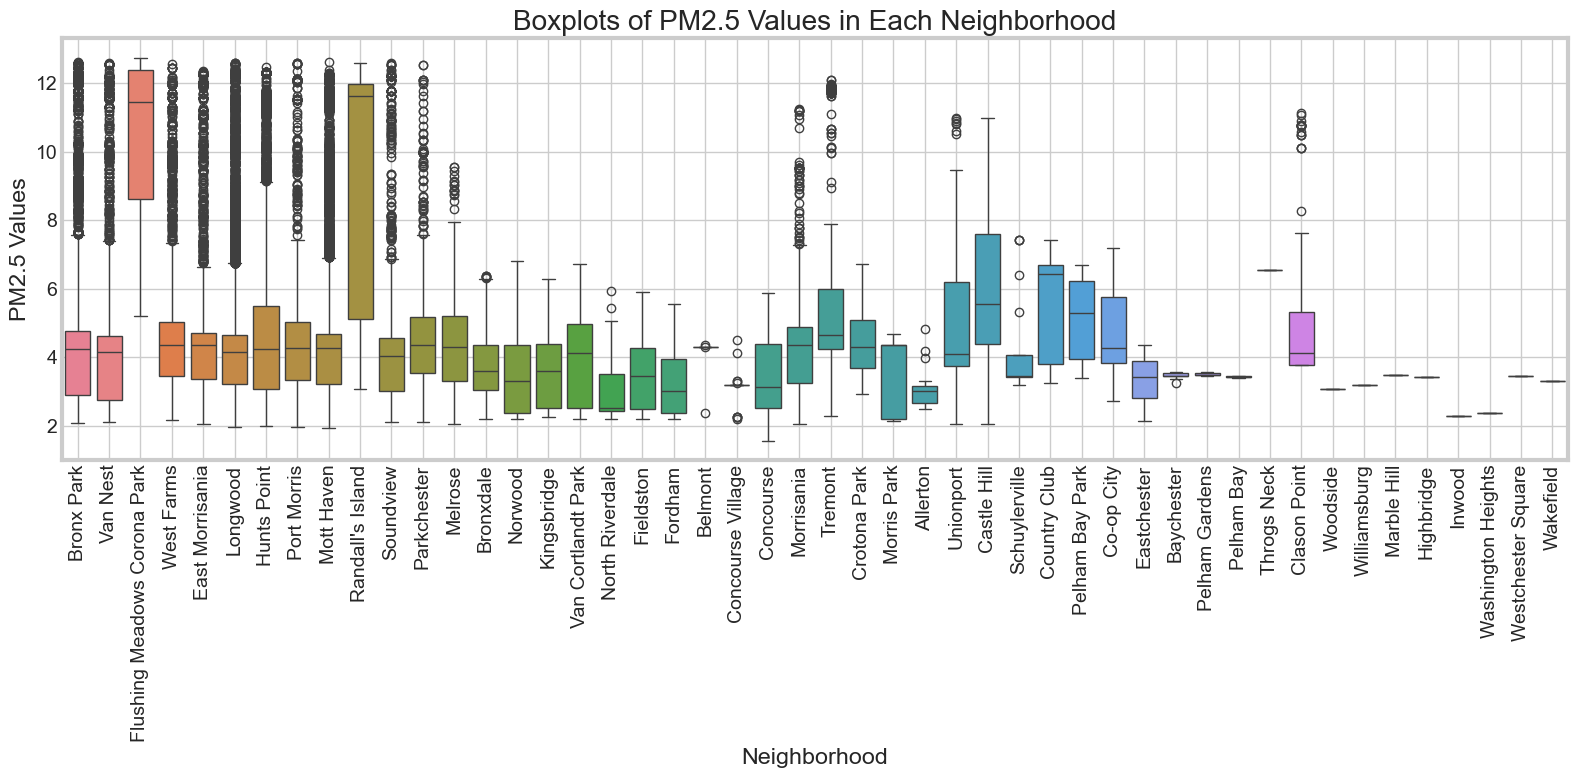

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the seaborn plots
sns.set_style("whitegrid")

# Plot boxplots for PM2.5 values in each neighborhood
plt.figure(figsize=(16, 8))  # Set a wider figure size

sns.boxplot(data=new_joined_gdf_pm25_2, x='neighborhood', y='pm25', hue='neighborhood')

# Add labels and title
plt.xlabel('Neighborhood')
plt.ylabel('PM2.5 Values')
plt.title('Boxplots of PM2.5 Values in Each Neighborhood')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


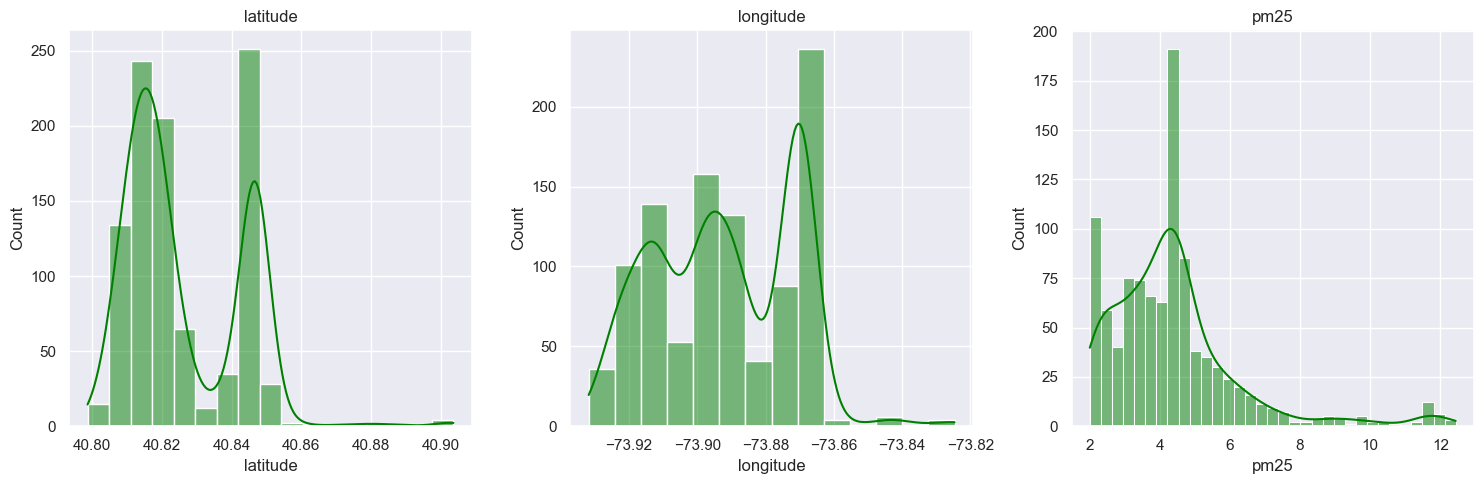

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(15, 5)})
columns_to_plot = ['latitude', 'longitude', 'pm25']
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.histplot(x=column, data=new_joined_gdf_pm25_2.sample(1000), stat='count', kde=True, color='green')
    plt.title(column)

plt.tight_layout()
plt.show()


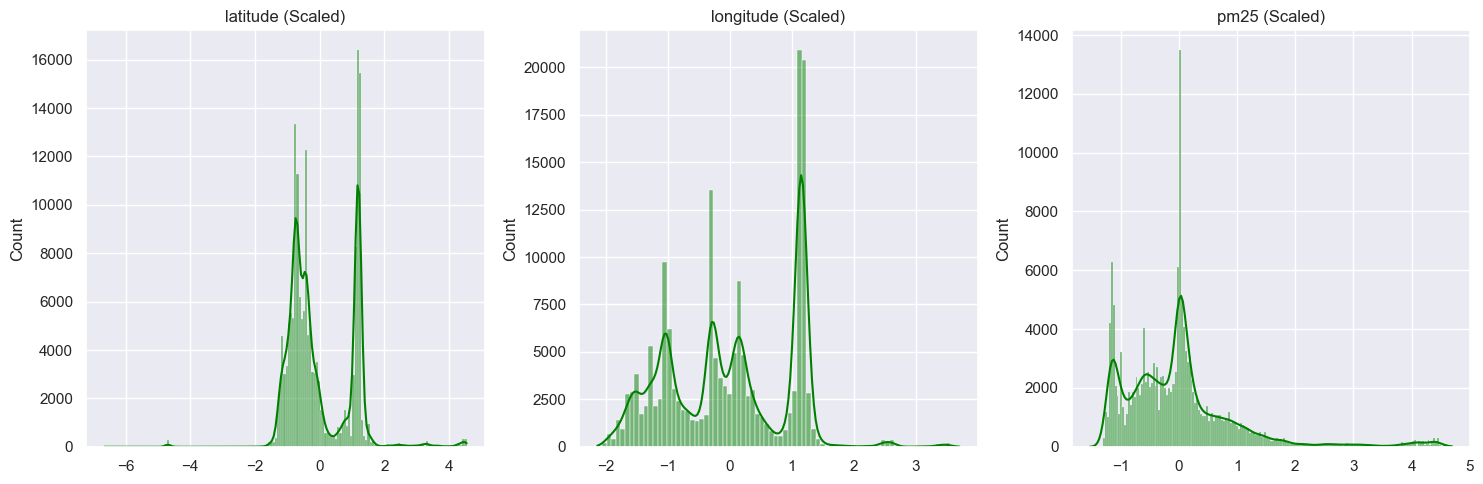

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming 'new_joined_gdf_pm25_2' is your DataFrame containing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_joined_gdf_pm25_2[['latitude', 'longitude', 'pm25']])

sns.set(rc={'figure.figsize':(15, 5)})
columns_to_plot = ['latitude', 'longitude', 'pm25']
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.histplot(x=scaled_data[:, i-1], stat='count', kde=True, color='green')
    plt.title(column + " (Scaled)")

plt.tight_layout()
plt.show()


## Scaling Features 

In [23]:
new=new_joined_gdf_pm25_2
# Fit and transform the scaler on the specified columns
features_scaled = scaler.fit_transform(new[['latitude', 'longitude', 'pm25']])

# Update the DataFrame with the scaled values
new['latitude'] = features_scaled[:, 0]
new['longitude'] = features_scaled[:, 1]
new['pm25'] = features_scaled[:, 2]
new

,neighborhood,latitude,longitude,pm25
0,Bronx Park,1.247148,1.200472,0.110286
1,Bronx Park,1.246916,1.200472,0.641630
2,Bronx Park,1.245812,1.198096,0.470271
3,Bronx Park,1.245812,1.198096,0.110286
4,Bronx Park,1.245812,1.198096,0.684580
...,...,...,...,...
161398,Highbridge,0.171082,-2.021579,-0.495496
161454,Inwood,1.897260,-1.554217,-1.124756
161455,Washington Heights,1.650854,-1.600705,-1.082711
161459,Westchester Square,0.789537,2.270788,-0.471528


## K-means, DBSCAN, and OPTICS Using Optimized Parameters for both SRS and stratified RS

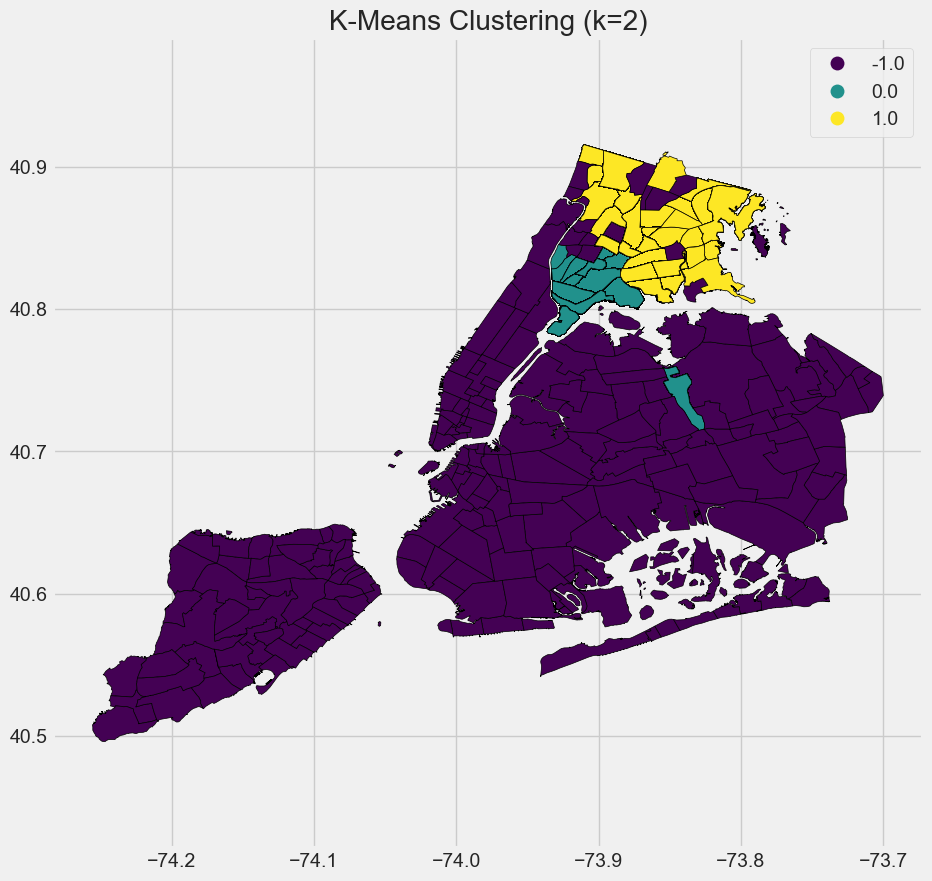

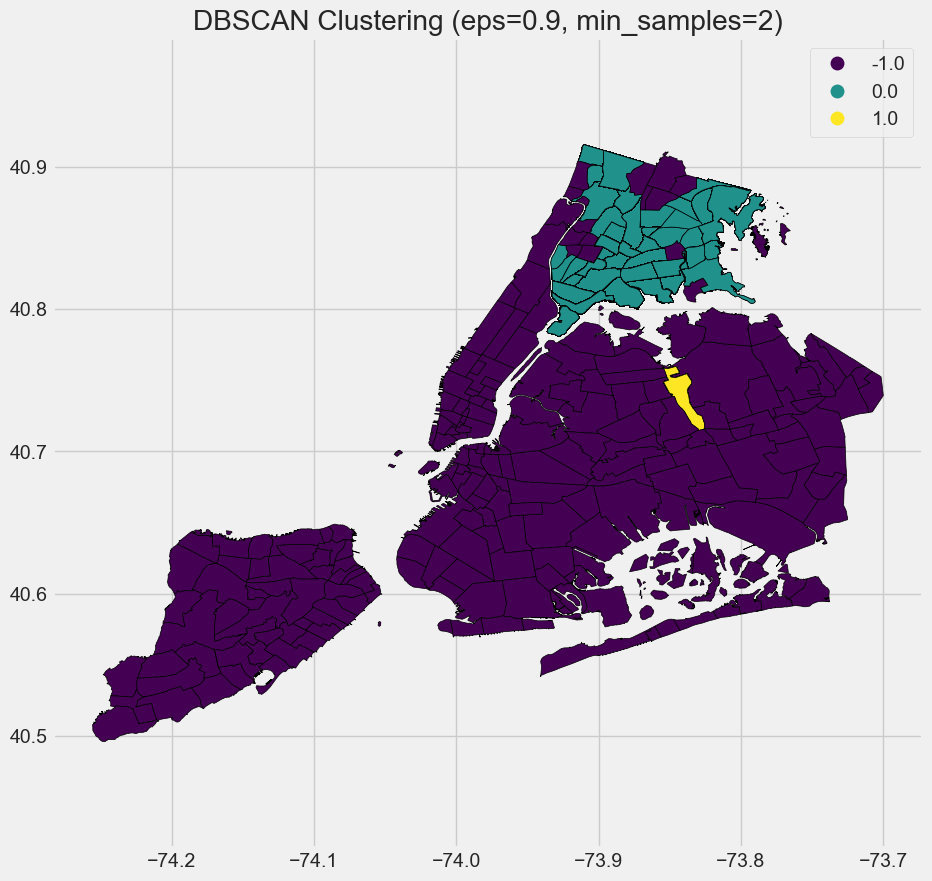

C:\Users\Manar Anwer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_optics.py:1081: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


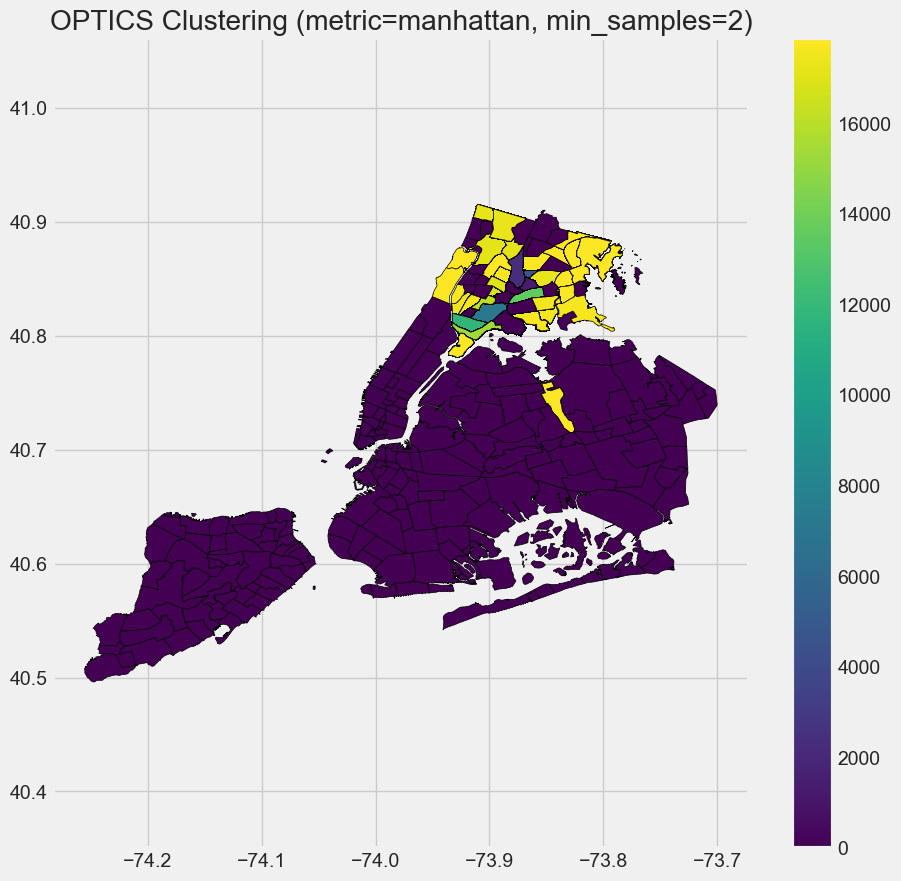

In [39]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.model_selection import train_test_split

def stratified_sampling(data, ratio):
    #Uncomment this line for stratified random sampling
   # sampled_data = data.groupby('neighborhood', group_keys=False).apply(lambda x: x.sample(frac=ratio)) 
    sampled_data = data.sample(frac=ratio)

    return sampled_data

def apply_clustering_algorithm(data, clustering_algorithm, params, sample_ratio):
    sampled_data = stratified_sampling(data, sample_ratio)
    
    algorithm = clustering_algorithm(**params)
    algorithm.fit(sampled_data[['latitude', 'longitude']])
    sampled_data['label'] = algorithm.labels_
    
    return sampled_data

def plot_clustered_map(data, title):
    gdf_pm25_result = gdf_neighbourhoods.merge(data, left_on='neighborhood', right_on='neighborhood', how='left')
    gdf_pm25_result['label'] = gdf_pm25_result['label'].fillna(-1)

    f, ax = plt.subplots()
    gdf_pm25_result.plot(
        column="label",
        categorical=True,
        cmap="viridis",
        edgecolor="k",
        lw=0.5,
        legend=True,
        ax=ax
    )
    ax.set_title(title)
    plt.axis("equal")
    plt.show()

# Example usage for K-Means
k_means_params = {'n_clusters': 2}
sample_ratio = 0.2
clustered_data_k_means = apply_clustering_algorithm(new, KMeans, k_means_params, sample_ratio)
plot_clustered_map(clustered_data_k_means, "K-Means Clustering (k=2)")

# Example usage for DBSCAN
db_scan_params = {'eps': 0.9, 'min_samples': 2}
sample_ratio = 0.3
clustered_data_db_scan = apply_clustering_algorithm(new, DBSCAN, db_scan_params, sample_ratio)
plot_clustered_map(clustered_data_db_scan, "DBSCAN Clustering (eps=0.9, min_samples=2)")

# Example usage for OPTICS
optics_params = {'metric': 'manhattan', 'min_samples': 2}
sample_ratio = 0.4
clustered_data_optics = apply_clustering_algorithm(new, OPTICS, optics_params, sample_ratio)
gdf_pm25_result = gdf_neighbourhoods.merge(clustered_data_optics, left_on='neighborhood', right_on='neighborhood', how='left')
gdf_pm25_result['label'] = gdf_pm25_result['label'].fillna(-1)

f, ax = plt.subplots()
gdf_pm25_result.plot(
    column="label",
    cmap="viridis",
    edgecolor="k",
    lw=0.5,
    legend=True,
    ax=ax
)
ax.set_title("OPTICS Clustering (metric=manhattan, min_samples=2)")
plt.axis("equal")
plt.show()


## Performance of stratified random sampling 

K-Means:
Silhouette Score: 0.678581036212
Davies-Bouldin Index: 0.416075639637
Training Time: 0.010999679565429688

DBSCAN:
Silhouette Score: 0.703373782125
Davies-Bouldin Index: 0.235357137515
Training Time: 12.108091115951538


C:\Users\Manar Anwer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_optics.py:1081: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]



OPTICS:
Silhouette Score: 0.520095003117
Davies-Bouldin Index: 1.71350106015
Training Time: 203.12510466575623


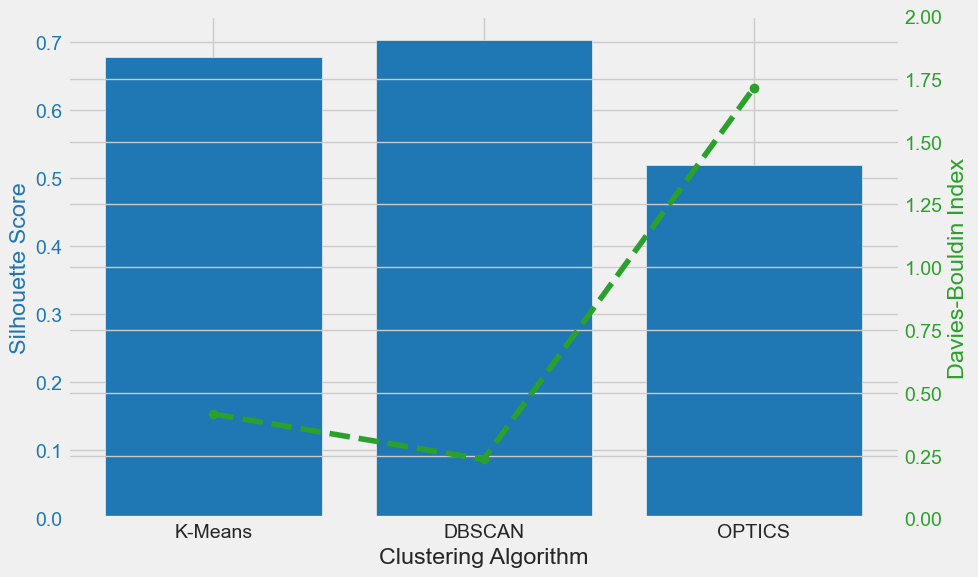

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
import time

def stratified_sampling(data, ratio):
    sampled_data = data.groupby('neighborhood', group_keys=False).apply(lambda x: x.sample(frac=ratio))
  #  sampled_data = data.sample(frac=ratio)
    return sampled_data

def apply_clustering_algorithm(data, clustering_algorithm, params, sample_ratio):
    sampled_data = stratified_sampling(data, sample_ratio)
    
    start_time = time.time()
    algorithm = clustering_algorithm(**params)
    algorithm.fit(sampled_data[['latitude', 'longitude']])
    end_time = time.time()
    
    silhouette = silhouette_score(sampled_data[['latitude', 'longitude']], algorithm.labels_)
    davies_bouldin = davies_bouldin_score(sampled_data[['latitude', 'longitude']], algorithm.labels_)
    training_time = end_time - start_time
    
    return silhouette, davies_bouldin, training_time

# Example usage for K-Means
k_means_params = {'n_clusters': 2}
sample_ratio = 0.2
silhouette_k_means, davies_bouldin_k_means, training_time_k_means = apply_clustering_algorithm(new, KMeans, k_means_params, sample_ratio)
print("K-Means:")
print("Silhouette Score:", silhouette_k_means)
print("Davies-Bouldin Index:", davies_bouldin_k_means)
print("Training Time:", training_time_k_means)

# Example usage for DBSCAN
db_scan_params = {'eps': 0.9, 'min_samples': 2}
sample_ratio = 0.3
silhouette_db_scan, davies_bouldin_db_scan, training_time_db_scan = apply_clustering_algorithm(new, DBSCAN, db_scan_params, sample_ratio)
print("\nDBSCAN:")
print("Silhouette Score:", silhouette_db_scan)
print("Davies-Bouldin Index:", davies_bouldin_db_scan)
print("Training Time:", training_time_db_scan)

# Example usage for OPTICS
optics_params = {'metric': 'manhattan', 'min_samples': 2}
sample_ratio = 0.4
silhouette_optics, davies_bouldin_optics, training_time_optics = apply_clustering_algorithm(new, OPTICS, optics_params, sample_ratio)
print("\nOPTICS:")
print("Silhouette Score:", silhouette_optics)
print("Davies-Bouldin Index:", davies_bouldin_optics)
print("Training Time:", training_time_optics)

# Plotting
labels = ['K-Means', 'DBSCAN', 'OPTICS']
silhouette_scores = [silhouette_k_means, silhouette_db_scan, silhouette_optics]
davies_bouldin_indices = [davies_bouldin_k_means, davies_bouldin_db_scan, davies_bouldin_optics]
training_times = [training_time_k_means, training_time_db_scan, training_time_optics]

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Clustering Algorithm')
ax1.set_ylabel('Silhouette Score', color=color)
ax1.bar(labels, silhouette_scores, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:green'
ax2.set_ylabel('Davies-Bouldin Index', color=color)  
ax2.plot(labels, davies_bouldin_indices, color=color, marker='o', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

ax.set_ylim(0, 0.7)
ax2.set_ylim(0, 2)

fig.tight_layout()  
plt.show()


## Performance for Simple Random Sampling

K-Means:
Silhouette Score: 0.680172027581
Davies-Bouldin Index: 0.414588813258
Training Time: 0.011999368667602539

DBSCAN:
Silhouette Score: 0.389648031059
Davies-Bouldin Index: 0.440433856953
Training Time: 7.526610374450684


C:\Users\Manar Anwer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_optics.py:1081: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]



OPTICS:
Silhouette Score: 0.520536982256
Davies-Bouldin Index: 1.66402257005
Training Time: 188.49683046340942


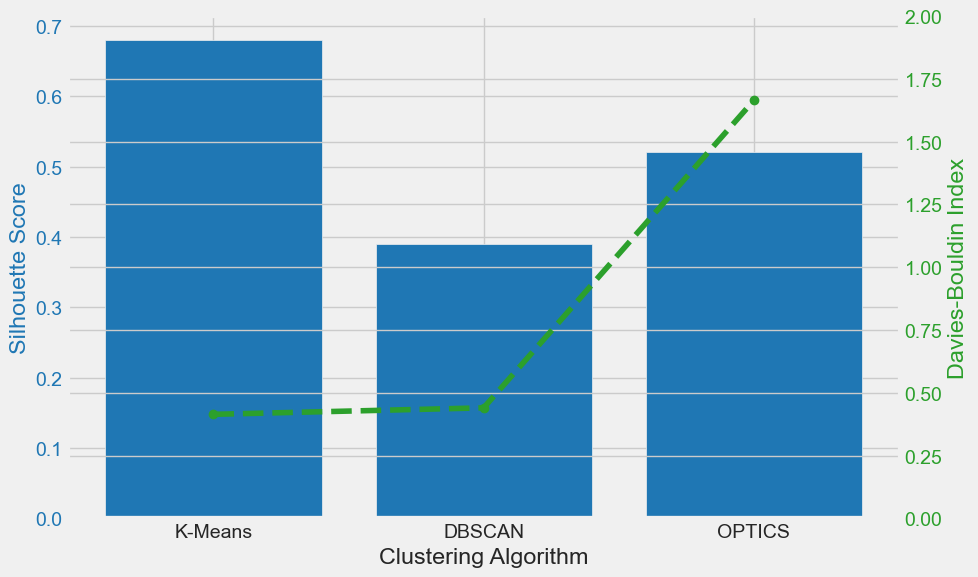

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
import time

def random_sampling(data, ratio):
    #sampled_data = data.groupby('neighborhood', group_keys=False).apply(lambda x: x.sample(frac=ratio))
    sampled_data = data.sample(frac=ratio)
    return sampled_data

def apply_clustering_algorithm(data, clustering_algorithm, params, sample_ratio):
    sampled_data = random_sampling(data, sample_ratio)
    
    start_time = time.time()
    algorithm = clustering_algorithm(**params)
    algorithm.fit(sampled_data[['latitude', 'longitude']])
    end_time = time.time()
    
    silhouette = silhouette_score(sampled_data[['latitude', 'longitude']], algorithm.labels_)
    davies_bouldin = davies_bouldin_score(sampled_data[['latitude', 'longitude']], algorithm.labels_)
    training_time = end_time - start_time
    
    return silhouette, davies_bouldin, training_time

# Example usage for K-Means
k_means_params = {'n_clusters': 2}
sample_ratio = 0.2
silhouette_k_means, davies_bouldin_k_means, training_time_k_means = apply_clustering_algorithm(new, KMeans, k_means_params, sample_ratio)
print("K-Means:")
print("Silhouette Score:", silhouette_k_means)
print("Davies-Bouldin Index:", davies_bouldin_k_means)
print("Training Time:", training_time_k_means)

# Example usage for DBSCAN
db_scan_params = {'eps': 0.9, 'min_samples': 2}
sample_ratio = 0.3
silhouette_db_scan, davies_bouldin_db_scan, training_time_db_scan = apply_clustering_algorithm(new, DBSCAN, db_scan_params, sample_ratio)
print("\nDBSCAN:")
print("Silhouette Score:", silhouette_db_scan)
print("Davies-Bouldin Index:", davies_bouldin_db_scan)
print("Training Time:", training_time_db_scan)

# Example usage for OPTICS
optics_params = {'metric': 'manhattan', 'min_samples': 2}
sample_ratio = 0.4
silhouette_optics, davies_bouldin_optics, training_time_optics = apply_clustering_algorithm(new, OPTICS, optics_params, sample_ratio)
print("\nOPTICS:")
print("Silhouette Score:", silhouette_optics)
print("Davies-Bouldin Index:", davies_bouldin_optics)
print("Training Time:", training_time_optics)

# Plotting
labels = ['K-Means', 'DBSCAN', 'OPTICS']
silhouette_scores = [silhouette_k_means, silhouette_db_scan, silhouette_optics]
davies_bouldin_indices = [davies_bouldin_k_means, davies_bouldin_db_scan, davies_bouldin_optics]
training_times = [training_time_k_means, training_time_db_scan, training_time_optics]

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Clustering Algorithm')
ax1.set_ylabel('Silhouette Score', color=color)
ax1.bar(labels, silhouette_scores, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:green'
ax2.set_ylabel('Davies-Bouldin Index', color=color)  
ax2.plot(labels, davies_bouldin_indices, color=color, marker='o', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

ax.set_ylim(0, 0.7)
ax2.set_ylim(0, 2)

fig.tight_layout()  
plt.show()


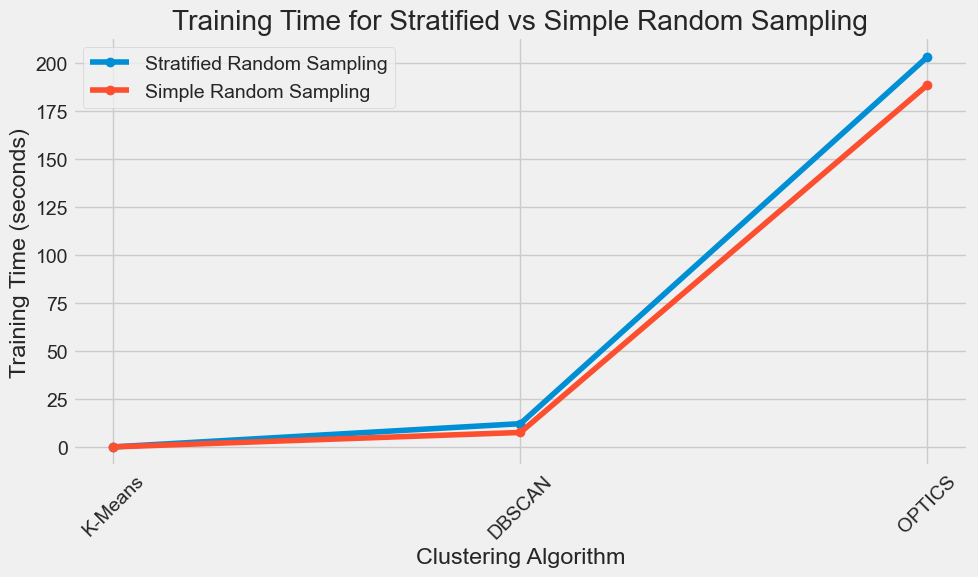

In [48]:
import matplotlib.pyplot as plt

# Results for stratified random sampling
stratified_training_times = [0.011, 12.108, 203.125]  # Training times for K-Means, DBSCAN, and OPTICS
stratified_algorithms = ['K-Means', 'DBSCAN', 'OPTICS']

# Results for simple random sampling
simple_training_times = [0.012, 7.527, 188.497]  # Training times for K-Means, DBSCAN, and OPTICS
simple_algorithms = ['K-Means', 'DBSCAN', 'OPTICS']

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(stratified_algorithms, stratified_training_times, marker='o', linestyle='-', label='Stratified Random Sampling')
plt.plot(simple_algorithms, simple_training_times, marker='o', linestyle='-', label='Simple Random Sampling')

plt.xlabel('Clustering Algorithm')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time for Stratified vs Simple Random Sampling')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Training time for Kmeans 

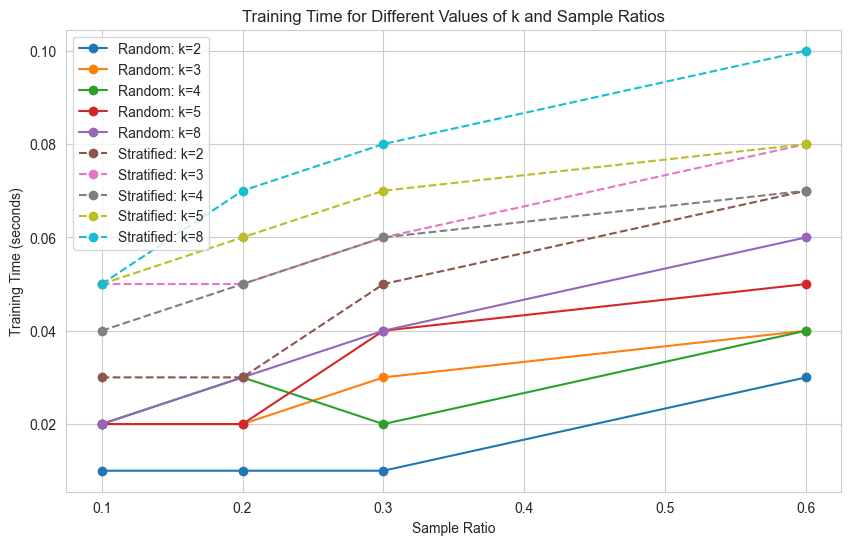

In [43]:
import matplotlib.pyplot as plt

# Random Sampling Data
k_values_random = [2, 3, 4, 5, 8]
sample_ratios_random = [0.1, 0.2, 0.3, 0.6]
training_times_random = {
    2: [0.01, 0.01, 0.01, 0.03],
    3: [0.02, 0.02, 0.03, 0.04],
    4: [0.02, 0.03, 0.02, 0.04],
    5: [0.02, 0.02, 0.04, 0.05],
    8: [0.02, 0.03, 0.04, 0.06]
}

# Stratified Random Sampling Data
k_values_stratified = [2, 3, 4, 5, 8]
sample_ratios_stratified = [0.1, 0.2, 0.3, 0.6]
training_times_stratified = {
    2: [0.03, 0.03, 0.05, 0.07],
    3: [0.05, 0.05, 0.06, 0.08],
    4: [0.04, 0.05, 0.06, 0.07],  # Adding data for k=4
    5: [0.05, 0.06, 0.07, 0.08],
    8: [0.05, 0.07, 0.08, 0.10]
}

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Random Sampling
for k, times in training_times_random.items():
    ax.plot(sample_ratios_random, times, marker='o', label=f'Random: k={k}')

# Stratified Random Sampling
for k, times in training_times_stratified.items():
    ax.plot(sample_ratios_stratified, times, linestyle='--', marker='o', label=f'Stratified: k={k}')

ax.set_xlabel('Sample Ratio')
ax.set_ylabel('Training Time (seconds)')
ax.set_title('Training Time for Different Values of k and Sample Ratios')
ax.legend(loc='upper left')

plt.show()


## DBSCAN TIMe eps

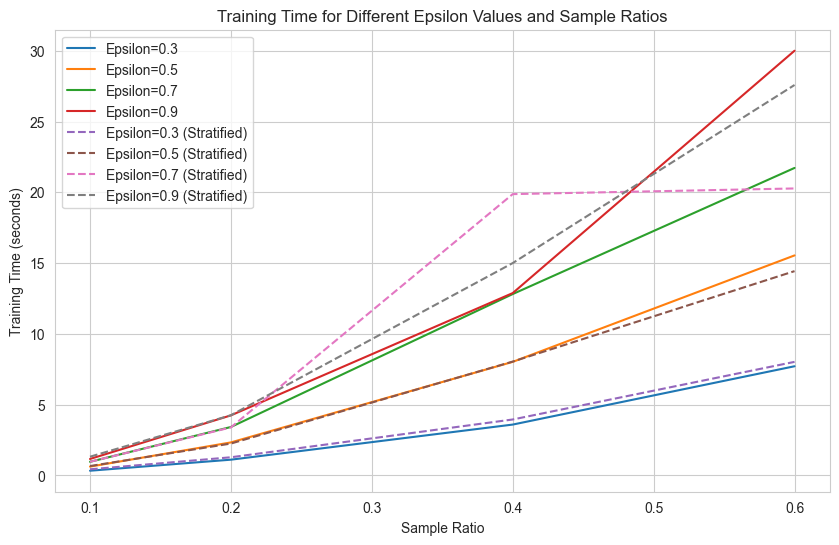

In [30]:
import matplotlib.pyplot as plt

# Random Sampling Data
random_sampling_data = {
    0.3: [0.33, 1.11, 3.59, 7.71],
    0.5: [0.62, 2.33, 8.02, 15.54],
    0.7: [0.96, 3.42, 12.81, 21.72],
    0.9: [1.16, 4.24, 12.88, 30.00]
}

# Stratified Random Sampling Data
stratified_sampling_data = {
    0.3: [0.43, 1.28, 3.95, 8.02],
    0.5: [0.66, 2.25, 8.04, 14.43],
    0.7: [0.96, 3.39, 19.87, 20.27],
    0.9: [1.32, 4.25, 15.00, 27.58]
}

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

sample_ratios = [0.1, 0.2, 0.4, 0.6]

# Plot Random Sampling
for epsilon, times in random_sampling_data.items():
    ax.plot(sample_ratios, times, label=f'Epsilon={epsilon}', linestyle='-')

# Plot Stratified Random Sampling
for epsilon, times in stratified_sampling_data.items():
    ax.plot(sample_ratios, times, label=f'Epsilon={epsilon} (Stratified)', linestyle='--')

ax.set_xlabel('Sample Ratio')
ax.set_ylabel('Training Time (seconds)')
ax.set_title('Training Time for Different Epsilon Values and Sample Ratios')
ax.legend()

plt.show()


## DBSCAN min_sample TIME

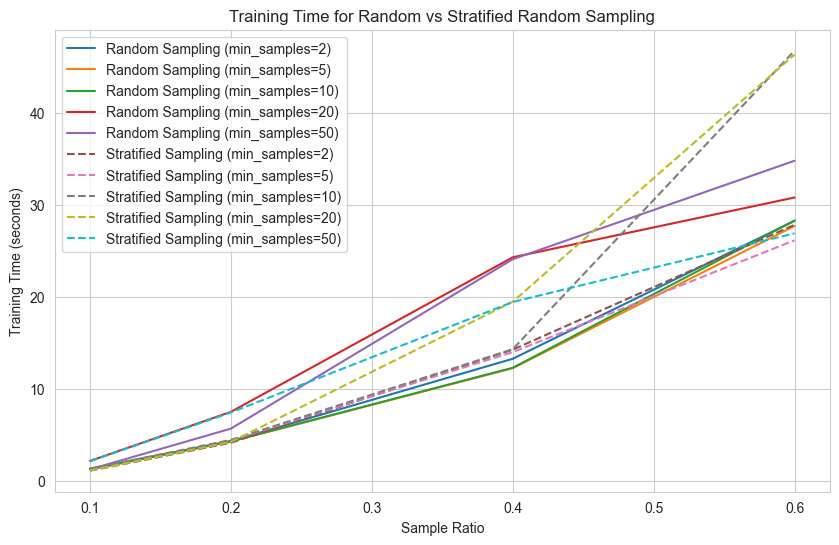

In [31]:
import matplotlib.pyplot as plt

# Random Sampling Data
sample_ratios_random = [0.1, 0.2, 0.4, 0.6]
min_samples_values_random = [2, 5, 10, 20, 50]
training_times_random = {
    2: [1.37, 4.36, 13.29, 28.26],
    5: [1.27, 4.31, 12.27, 27.70],
    10: [1.31, 4.33, 12.31, 28.29],
    20: [2.20, 7.53, 24.30, 30.79],
    50: [1.29, 5.71, 24.09, 34.78]
}

# Stratified Random Sampling Data
sample_ratios_stratified = [0.1, 0.2, 0.4, 0.6]
min_samples_values_stratified = [2, 5, 10, 20, 50]
training_times_stratified = {
    2: [1.14, 4.18, 14.28, 27.83],
    5: [1.17, 4.44, 14.01, 26.15],
    10: [1.34, 4.48, 14.33, 46.72],
    20: [1.16, 4.26, 19.48, 46.30],
    50: [2.17, 7.46, 19.45, 26.90]
}

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Random Sampling Plot
for k, times in training_times_random.items():
    ax.plot(sample_ratios_random, times, label=f'Random Sampling (min_samples={k})')

# Stratified Random Sampling Plot
for k, times in training_times_stratified.items():
    ax.plot(sample_ratios_stratified, times, linestyle='--', label=f'Stratified Sampling (min_samples={k})')

ax.set_xlabel('Sample Ratio')
ax.set_ylabel('Training Time (seconds)')
ax.set_title('Training Time for Random vs Stratified Random Sampling')
ax.legend()

plt.show()


## Optics Time

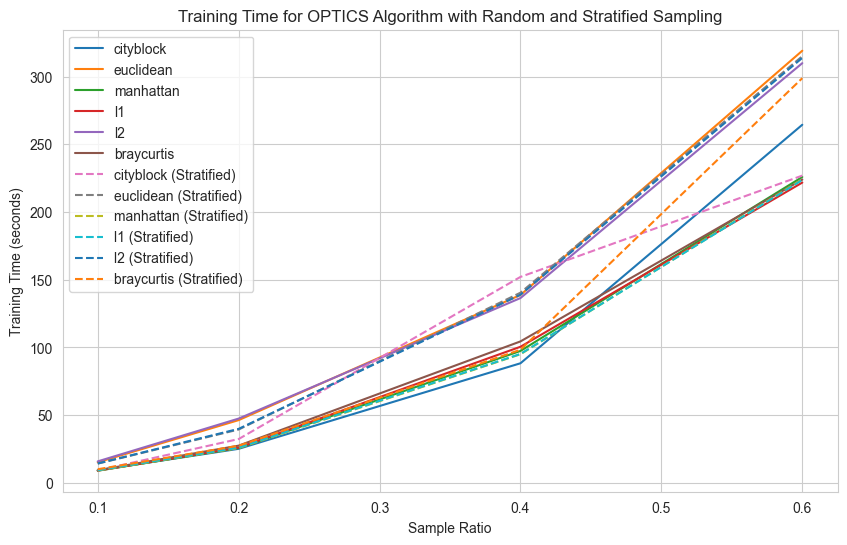

In [36]:
import matplotlib.pyplot as plt

# Data for random sampling
metrics = ['cityblock', 'euclidean', 'manhattan', 'l1', 'l2', 'braycurtis']
sample_ratios = [0.1, 0.2, 0.4, 0.6]
random_training_times = {
    'cityblock': [9.25, 25.11, 88.27, 264.38],
    'euclidean': [15.16, 46.30, 138.71, 319.04],
    'manhattan': [8.93, 25.71, 97.37, 225.82],
    'l1': [9.02, 26.05, 100.46, 221.69],
    'l2': [15.83, 47.43, 136.43, 309.86],
    'braycurtis': [9.28, 27.45, 104.41, 223.91]
}

# Data for stratified random sampling
stratified_training_times = {
    'cityblock': [9.20, 32.33, 152.04, 226.84],
    'euclidean': [14.17, 39.36, 140.38, 315.00],
    'manhattan': [9.12, 25.66, 94.93, 224.08],
    'l1': [9.28, 25.98, 95.17, 223.63],
    'l2': [14.30, 39.84, 138.89, 313.76],
    'braycurtis': [10.04, 27.37, 98.25, 298.79]
}

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot lines for random sampling
for metric in metrics:
    ax.plot(sample_ratios, random_training_times[metric], label=metric)

# Plot lines for stratified random sampling
for metric in metrics:
    ax.plot(sample_ratios, stratified_training_times[metric], label=metric + ' (Stratified)', linestyle='--')

ax.set_xlabel('Sample Ratio')
ax.set_ylabel('Training Time (seconds)')
ax.set_title('Training Time for OPTICS Algorithm with Random and Stratified Sampling')
ax.legend()

plt.show()


## Testing on new Data

In [30]:
nyc= r"C:\Users\Manar Anwer\PycharmProjects\DSF_Clustering\pythonProject1\ds-project-clustering-AQ-data-main\data\nyc1.csv"
nycdata = pd.read_csv(nyc) #contents of data)
nycdata.head()

,id,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,0,2,2016-01-01 00:29:24,2016-01-01 00:39:36,N,1,-73.928642,40.680611,-73.924278,40.698044,...,8.0,0.5,0.5,1.86,0.0,NaN,0.3,11.16,1,1.0
1,1,2,2016-01-01 00:19:39,2016-01-01 00:39:18,N,1,-73.952675,40.723175,-73.923920,40.761379,...,15.5,0.5,0.5,0.00,0.0,NaN,0.3,16.80,2,1.0
2,2,2,2016-01-01 00:19:33,2016-01-01 00:39:48,N,1,-73.971611,40.676105,-74.013161,40.646072,...,16.5,0.5,0.5,4.45,0.0,NaN,0.3,22.25,1,1.0
3,3,2,2016-01-01 00:22:12,2016-01-01 00:38:32,N,1,-73.989502,40.669579,-74.000648,40.689034,...,13.5,0.5,0.5,0.00,0.0,NaN,0.3,14.80,2,1.0
4,4,2,2016-01-01 00:24:01,2016-01-01 00:39:22,N,1,-73.964729,40.682854,-73.940720,40.663013,...,12.0,0.5,0.5,0.00,0.0,NaN,0.3,13.30,2,1.0
